# Loan Default Prediction

# Group 4

# Group Members -

# Anuksha jain - 015002
# Ayushi Gupta - 015005
# Aniket Nandy - 015015
# Biswadip Das - 015025
# Siddharth Gupta - 015045

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import time
warnings.filterwarnings("ignore")
# Splitting data into training and testing
from sklearn.model_selection import train_test_split


In [3]:
train=pd.read_csv(r"C:\Users\dell\Desktop\train_v2.csv")

In [4]:
train.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
0,1,126,10,0.686842,1100,3,13699,7201.0,4949.0,126.75,...,5,2.14,-1.54,1.18,0.1833,0.7873,1,0,5,0
1,2,121,10,0.782776,1100,3,84645,240.0,1625.0,123.52,...,6,0.54,-0.24,0.13,0.1926,-0.6787,1,0,5,0
2,3,126,10,0.500080,1100,3,83607,1800.0,1527.0,127.76,...,13,2.89,-1.73,1.04,0.2521,0.7258,1,0,5,0
3,4,134,10,0.439874,1100,3,82642,7542.0,1730.0,132.94,...,4,1.29,-0.89,0.66,0.2498,0.7119,1,0,5,0
4,5,109,9,0.502749,2900,4,79124,89.0,491.0,122.72,...,26,6.11,-3.82,2.51,0.2282,-0.5399,0,0,5,0


In [5]:
train.shape

(105471, 771)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105471 entries, 0 to 105470
Columns: 771 entries, id to loss
dtypes: float64(653), int64(99), object(19)
memory usage: 620.4+ MB


In [7]:
train.isnull().sum()

id         0
f1         0
f2         0
f3         0
f4         0
        ... 
f775    1525
f776       0
f777       0
f778       0
loss       0
Length: 771, dtype: int64

In [8]:
train.shape

(105471, 771)

In [9]:
# # Missing Values

# Function to calculate missing values by column
def total_missing_values(train):
        # Total missing values
        count_nulls = train.isnull().sum()
        
        # Percentage of missing values
        null_percentage = 100 * train.isnull().sum() / len(train)
        
        # Make a table with the results
        null_data = pd.concat([count_nulls, null_percentage], axis=1)
        
        # Rename the columns
        null_data_ren_columns = null_data.rename(columns = {0 : 'null values', 1 : 'null_percent'})
        
        # Sort the table by percentage of missing descending
        null_data_ren_columns = null_data_ren_columns[
            null_data_ren_columns.iloc[:,1] != 0].sort_values('null_percent', ascending=False).round(1)
        
        # Print some summary information
        print ('train has' + str(train.shape[1]) + " columns"      
            " and " + str(null_data_ren_columns.shape[0]) +
              " columns with null values.")
        
        # Return the dataframe with missing information
        return null_data_ren_columns

In [10]:
total_missing_values(train).head(50)

train has771 columns and 525 columns with null values.


,null values,null_percent
f662,18833,17.9
f663,18833,17.9
f159,18736,17.8
f160,18736,17.8
f170,18417,17.5
f169,18417,17.5
f618,18407,17.5
f619,18407,17.5
f331,18067,17.1
f330,18067,17.1


In [11]:
train.fillna(train.mean(), inplace=True)

In [12]:
total_missing_values(train).head(50)

train has771 columns and 12 columns with null values.


,null values,null_percent
f206,1291,1.2
f207,1291,1.2
f390,698,0.7
f391,698,0.7
f626,698,0.7
f627,698,0.7
f695,698,0.7
f698,698,0.7
f138,182,0.2
f137,177,0.2


In [13]:
train.dropna(inplace=True)
total_missing_values(train)

train has771 columns and 0 columns with null values.


,null values,null_percent


In [14]:
train.shape

(103302, 771)

In [15]:
# # # Exploratory Data Analysis

for i in train.select_dtypes(include=['object']).columns:
    train.drop(labels=i, axis=1, inplace=True)

In [16]:
# # Correlations between Features and Target

# Find all correlations and sort 
corr = train.corr()['loss'].sort_values()

# Print the most negative correlations
print(corr.head(10), '\n')

# Print the most positive correlations
print(corr.tail(10))

f612   -0.016943
f776   -0.015111
f315   -0.011106
f70    -0.010740
f314   -0.010689
f323   -0.010676
f69    -0.010269
f322   -0.009299
f734   -0.009284
f738   -0.008635
Name: loss, dtype: float64 

f34    NaN
f35    NaN
f37    NaN
f38    NaN
f678   NaN
f700   NaN
f701   NaN
f702   NaN
f736   NaN
f764   NaN
Name: loss, dtype: float64


In [17]:
for i in train.columns:
    if len(set(train[i]))==1:
        train.drop(labels=[i], axis=1, inplace=True)

In [18]:
# Find all correlations and sort 
corr = train.corr()['loss'].sort_values()

# Print the most negative correlations
print(corr.head(15), '\n')

# Print the most positive correlations
print(corr.tail(15))

f612   -0.016943
f776   -0.015111
f315   -0.011106
f70    -0.010740
f314   -0.010689
f323   -0.010676
f69    -0.010269
f322   -0.009299
f734   -0.009284
f738   -0.008635
f1     -0.008162
f631   -0.008097
f428   -0.007973
f666   -0.007868
f299   -0.007778
Name: loss, dtype: float64 

f282    0.010726
f251    0.010915
f221    0.010968
f556    0.011575
f675    0.011606
f13     0.011933
f68     0.013375
f599    0.014165
f597    0.014165
f670    0.014811
f67     0.015012
f674    0.018999
f536    0.026087
f471    0.039538
loss    1.000000
Name: loss, dtype: float64


In [19]:
train.shape

(103302, 741)

In [20]:
# # # Feature Engineering and Selection

def remove_collinear_features(x, threshold):
    #remove outer effecting data
    # Dont want to remove correlations between loss
    y = x['loss']
    x = x.drop(columns = ['loss'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # comparinf correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # corr > threshold, then drop
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    
    # Add the score back in to the data
    x['loss'] = y
               
    return x

In [21]:
# Remove the collinear features above a specified correlation coefficient
train = remove_collinear_features(train, 0.6);

In [22]:
train.shape

(103302, 156)

<AxesSubplot:>

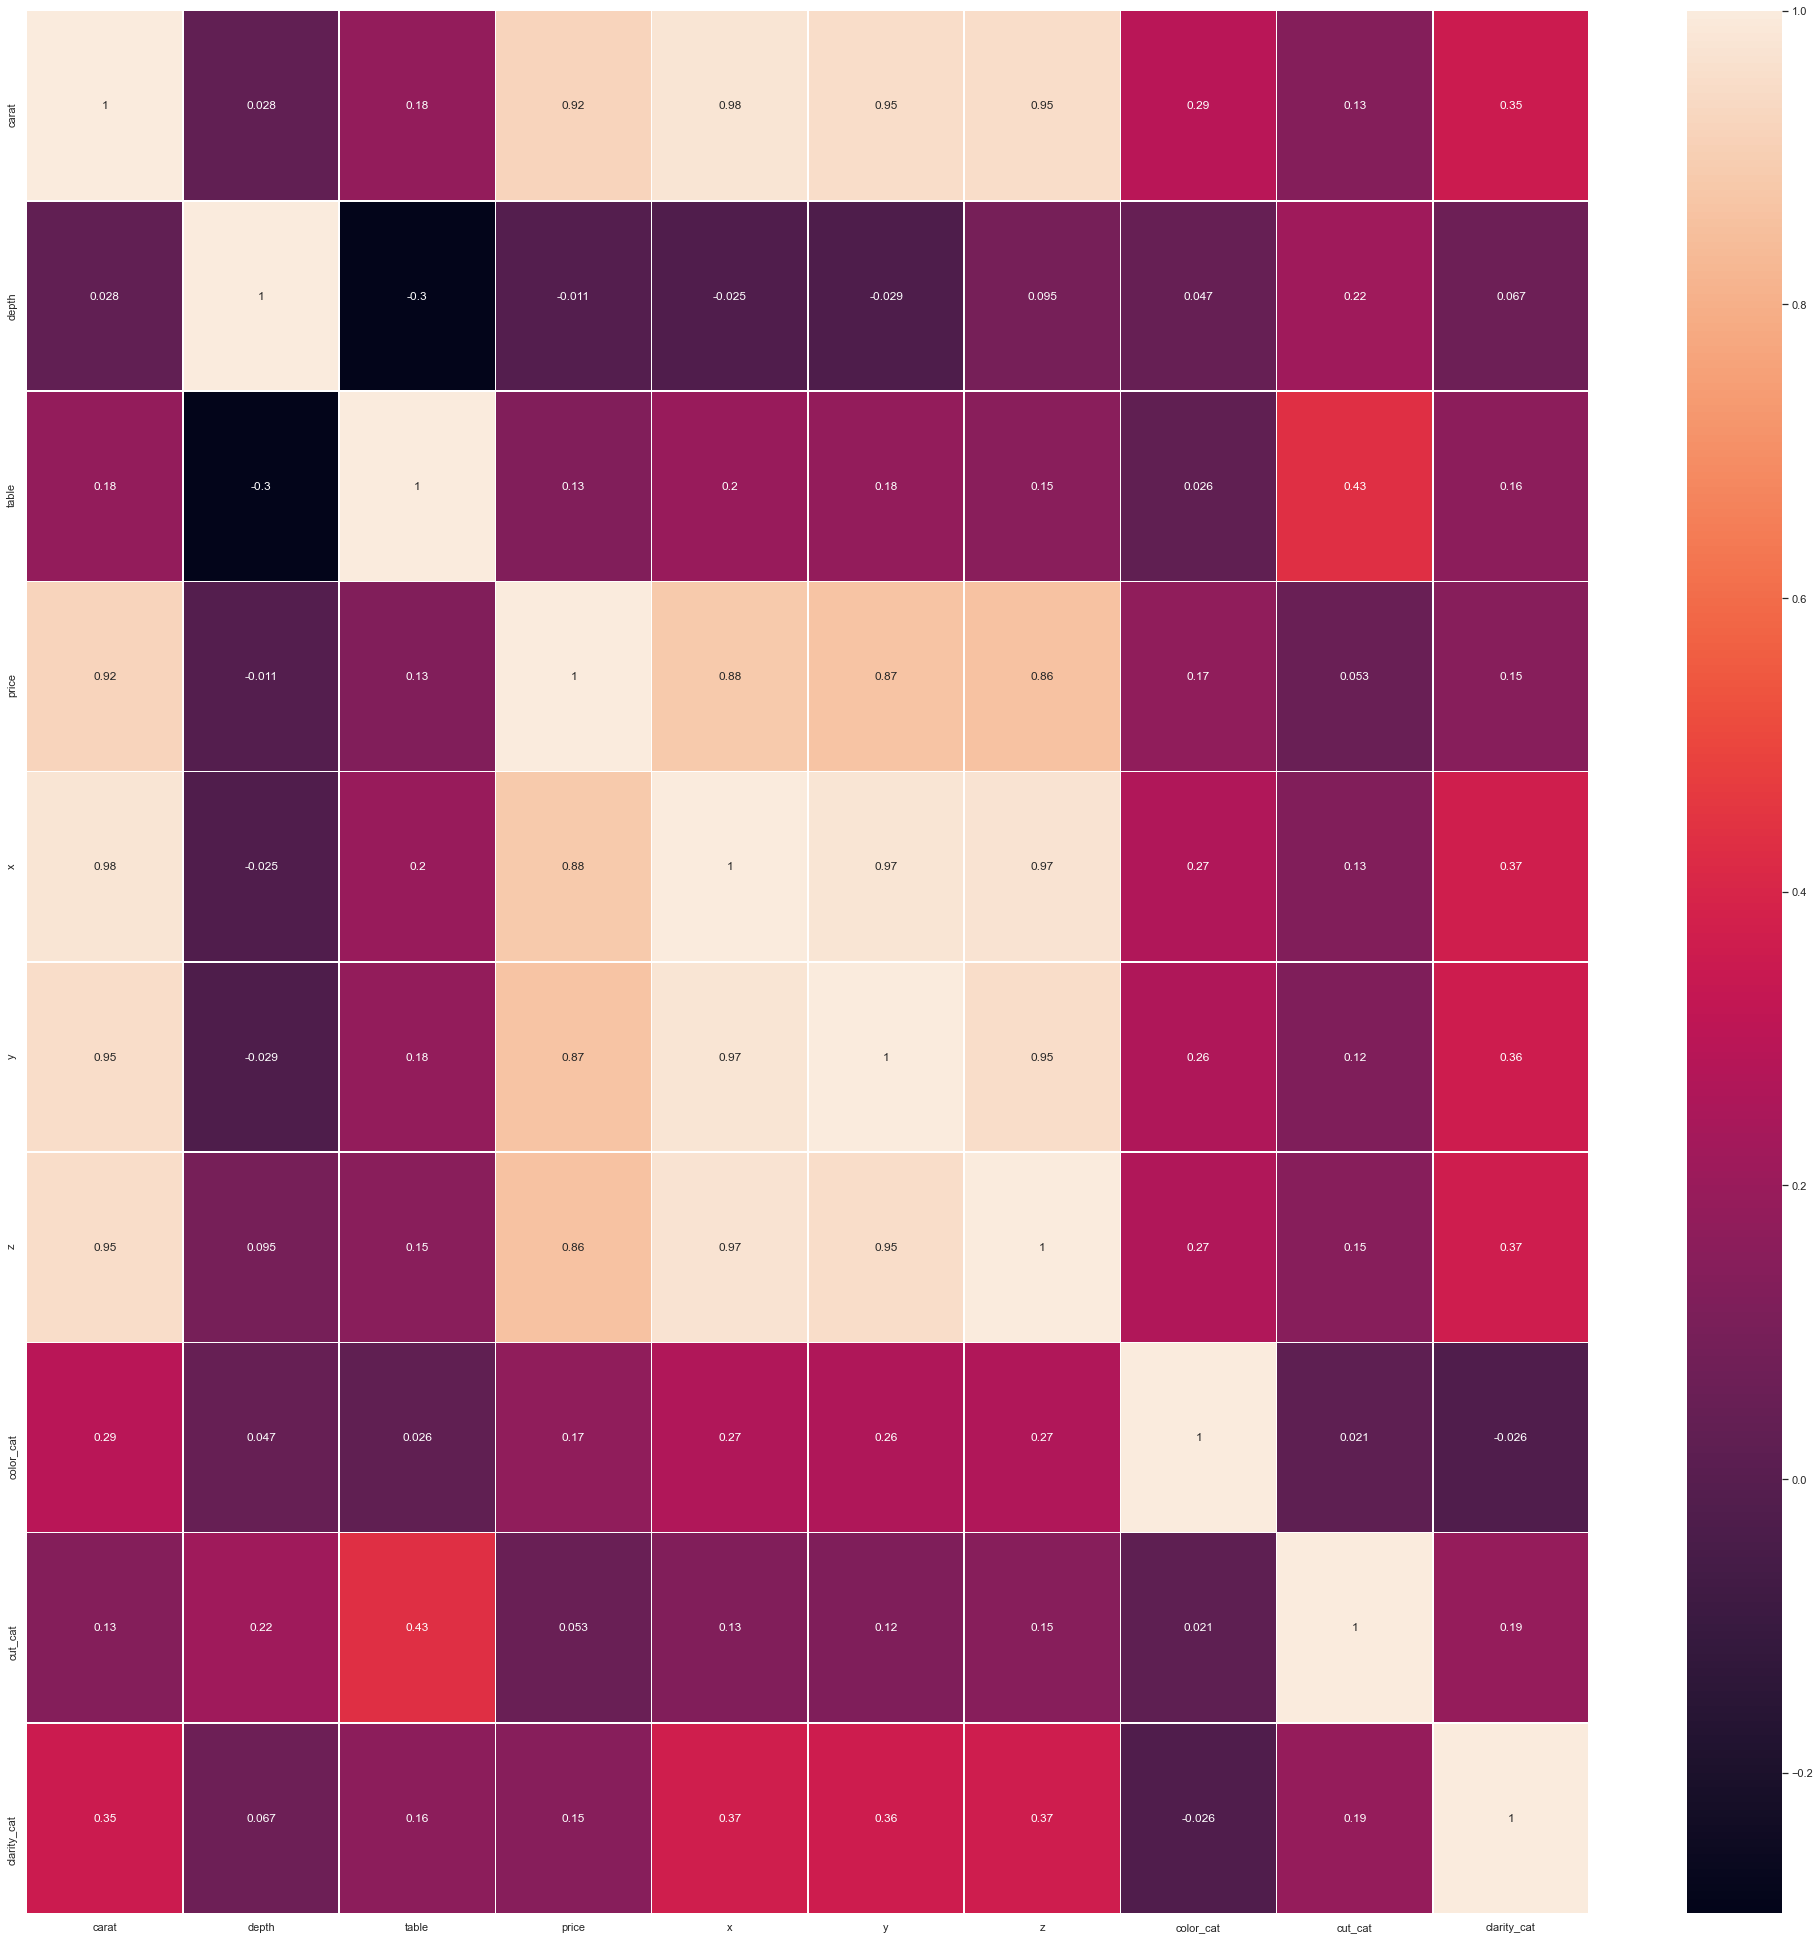

In [41]:
sns.set_theme()
fig, ax = plt.subplots(figsize=(35,35)) 
correlation_matrix = train.corr()
sns.heatmap(correlation_matrix,annot=True,linewidths=.5,ax=ax)

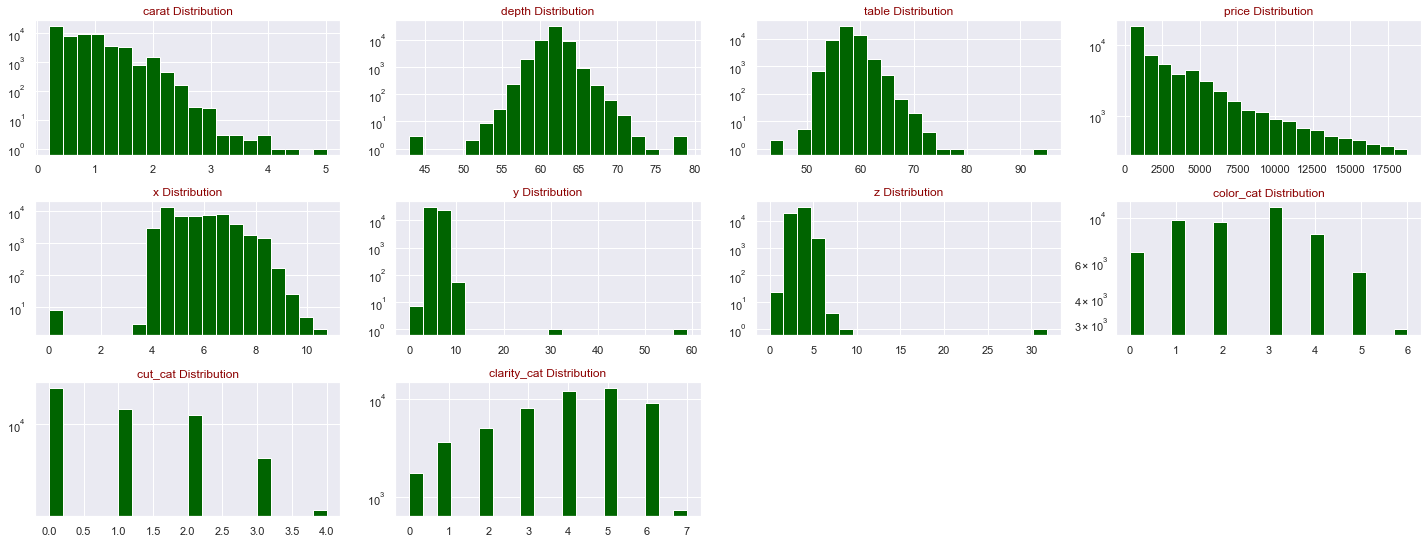

In [42]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='darkgreen')
        ax.set_title(feature+" Distribution",color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()
draw_histograms(train,train.columns,8,4)

In [24]:
# # # Split Into Training and Testing Sets

# Separate out the features and targets
features = train.drop(columns='loss')
targets = pd.DataFrame(train['loss'])

# Split into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(82641, 155)
(20661, 155)
(82641, 1)
(20661, 1)


In [25]:
# # Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
# Convert y to one-dimensional array (vector)
y_train = np.array(y_train).reshape((-1, ))
y_test = np.array(y_test).reshape((-1, ))

In [27]:
X_train

array([[-1.06877109, -0.16688215,  1.03564494, ..., -0.61327879,
         0.65159233, -0.66443318],
       [-0.48425848,  2.15138579, -0.14682708, ..., -0.86473327,
         0.74503266, -0.66443318],
       [-0.43576466,  1.60591098, -0.73806309, ...,  1.07833542,
         1.24726226,  1.50504223],
       ...,
       [ 0.84197055, -0.57598826,  1.03564494, ...,  0.82039823,
        -0.75457294,  1.50504223],
       [-1.69955094, -0.64417261,  0.44440893, ..., -1.37936099,
        -0.4115703 , -0.66443318],
       [-1.20154789,  1.06043617, -0.14682708, ..., -0.67299456,
         0.87515049, -0.66443318]])

In [28]:
X_test

array([[-0.47027681, -1.18964742,  1.03564494, ...,  0.83261565,
         4.19883151,  1.50504223],
       [ 0.34727464,  1.67409533, -0.73806309, ..., -1.49355648,
         0.76570014, -0.66443318],
       [ 1.02805453, -0.3714352 , -2.51177113, ..., -0.96808269,
         1.03078733,  1.50504223],
       ...,
       [ 0.29720911,  0.92406747, -0.73806309, ..., -1.16904681,
        -0.70741614, -0.66443318],
       [ 0.85975052, -0.91691001,  1.03564494, ..., -0.85600654,
        -0.90497014,  1.50504223],
       [ 0.00752321, -1.18964742, -1.3292991 , ..., -1.04126255,
         0.69224809, -0.66443318]])

In [29]:
!pip install bayesian-optimization

In [43]:
# Model Building
 # RandomForest with Bayes optimization
# xgboost with Bayes optimization
# Lightgbm with Bayes optimization

In [30]:
from bayes_opt import BayesianOptimization
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [31]:
#Bayesian optimization
def bayesian_optimization(dataset, function, parameters):
   X_train, y_train, X_test, y_test = dataset
   n_iterations = 5
   gp_params = {"alpha": 1e-4}

   BO = BayesianOptimization(function, parameters)
   BO.maximize(n_iter=n_iterations, **gp_params)

   return BO.max

In [32]:
def rfc_optimization(cv_splits):
    def function(n_estimators, max_depth, min_samples_split):
        return cross_val_score(
               RandomForestClassifier(
                   n_estimators=int(max(n_estimators,0)),                                                               
                   max_depth=int(max(max_depth,1)),
                   min_samples_split=int(max(min_samples_split,2)), 
                   n_jobs=-1, 
                   random_state=42,   
                   class_weight="balanced"),  
               X=X_train, 
               y=y_train, 
               cv=cv_splits,
               scoring="roc_auc",
               n_jobs=-1).mean()

    parameters = {"n_estimators": (10, 1000),
                  "max_depth": (1, 150),
                  "min_samples_split": (2, 10)}
    
    return function, parameters

In [33]:
def xgb_optimization(cv_splits, eval_set):
    def function(eta, gamma, max_depth):
            return cross_val_score(
                   xgb.XGBClassifier(
                       objective="binary:logistic",
                       learning_rate=max(eta, 0),
                       gamma=max(gamma, 0),
                       max_depth=int(max_depth),                                               
                       seed=42,
                       nthread=-1,
                       scale_pos_weight = len(y_train[y_train == 0])/
                                          len(y_train[y_train == 1])),  
                   X=X_train, 
                   y=y_train, 
                   cv=cv_splits,
                   scoring="roc_auc",
                   fit_params={
                        "early_stopping_rounds": 10, 
                        "eval_metric": "auc", 
                        "eval_set": eval_set},
                   n_jobs=-1).mean()

    parameters = {"eta": (0.001, 0.4),
                  "gamma": (0, 20),
                  "max_depth": (1, 2000)}
    
    return function, parameters

In [34]:
#Train model
def train(X_train, y_train, X_test, y_test, function, parameters):
    dataset = (X_train, y_train, X_test, y_test)
    cv_splits = 4
    
    best_solution = bayesian_optimization(dataset, function, parameters)      
    params = best_solution["params"]

    model = RandomForestClassifier(
             n_estimators=int(max(params["n_estimators"], 0)),
             max_depth=int(max(params["max_depth"], 1)),
             min_samples_split=int(max(params["min_samples_split"], 2)), 
             n_jobs=-1, 
             random_state=42,   
             class_weight="balanced")

    model.fit(X_train, y_train)
    
    return model

In [35]:
!pip install lightgbm

In [36]:
import lightgbm as lgb
from bayes_opt import BayesianOptimization

train = sns.load_dataset('diamonds')

train["color"] = train["color"].astype('category')
train["color_cat"] = train["color"].cat.codes
train = train.drop(["color"],axis = 1)

train["cut"] = train["cut"].astype('category')
train["cut_cat"] = train["cut"].cat.codes
train = train.drop(["cut"],axis = 1)

train["clarity"] = train["clarity"].astype('category')
train["clarity_cat"] = train["clarity"].cat.codes
train = train.drop(["clarity"],axis = 1)

y = train['price']
X = train.drop(['price'], axis=1)

seed = 7
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,random_state=seed)

train_lgb = lgb.Dataset(X_train, y_train)
eval_lgb = lgb.Dataset(X_test, y_test, reference = train_lgb)

params = { 'objective': 'regression',
  'metric': 'RMSE',
  'learning_rate': 0.02}
lgb_reg = lgb.train(params, train_lgb, num_boost_round = 10000, early_stopping_rounds=50, verbose_eval = 100, valid_sets=eval_lgb)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000799 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1267
[LightGBM] [Info] Number of data points in the train set: 37758, number of used features: 9
[LightGBM] [Info] Start training from score 3935.724588
Training until validation scores don't improve for 50 rounds
[100]	valid_0's rmse: 857.111
[200]	valid_0's rmse: 576.605
[300]	valid_0's rmse: 546.569
[400]	valid_0's rmse: 540.681
[500]	valid_0's rmse: 538.675
[600]	valid_0's rmse: 537.972
Early stopping, best iteration is:
[613]	valid_0's rmse: 537.86


In [37]:
def modelFitter(colsampleByTree, subsample,maxDepth, num_leaves):   
    model = lgb.LGBMRegressor(learning_rate=0.02, n_estimators=10000, max_depth=maxDepth.astype("int32"), subsample=subsample, colsample_bytree=colsampleByTree,num_leaves=num_leaves.astype("int32"))

    evalSet  = [(X_test, y_test)]
    model.fit(X_train, y_train, eval_metric="rmse", eval_set=evalSet, early_stopping_rounds=50, verbose=False)

    bestScore = model.best_score_[list(model.best_score_.keys())[0]]['rmse']

    return -bestScore

# Bounded region of parameter space
pbounds = {'colsampleByTree': (0.8,1.0), 'subsample': (0.8,1.0), 'maxDepth': (2,5), 'num_leaves': (24, 45)}

optimizer = BayesianOptimization(
    f=modelFitter,
    pbounds=pbounds,
    random_state=1)

optimizer.maximize(init_points=5,n_iter=5)  #n_iter=bayesian, init_points=random

|   iter    |  target   | colsam... | maxDepth  | num_le... | subsample |
-------------------------------------------------------------------------
|  1        | -541.4    |  0.8834   |  4.161    |  24.0     |  0.8605   |
|  2        | -628.4    |  0.8294   |  2.277    |  27.91    |  0.8691   |
|  3        | -565.2    |  0.8794   |  3.616    |  32.8     |  0.937    |
|  4        | -541.4    |  0.8409   |  4.634    |  24.58    |  0.9341   |
|  5        | -565.2    |  0.8835   |  3.676    |  26.95    |  0.8396   |
|  6        | -628.4    |  0.8018   |  2.036    |  24.0     |  0.8074   |
|  7        | -544.8    |  0.9847   |  4.934    |  26.07    |  0.8586   |
|  8        | -541.4    |  0.9292   |  4.734    |  35.8     |  0.9707   |
|  9        | -628.4    |  0.8228   |  2.782    |  36.43    |  0.9375   |
|  10       | -544.8    |  0.9825   |  4.996    |  34.43    |  0.8723   |
